In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter


In [2]:
from bs4 import BeautifulSoup

In [3]:
link = "https://www.froelichundkaufmann.de/aktueller-newsletter/?ldtype=line&_artperpage=96&pgNr=0&cl=alist&searchparam=&cnid=gvgcat%3A346"

In [4]:
req = requests.get(link)
soup = BeautifulSoup(req.content, 'html.parser')

In [5]:
soup

<!DOCTYPE html>

<html lang="de">
<head>
<script type="text/javascript">
                dataLayer=[];
            </script>
<script>
        // Measures product impressions on category view
        var impressions = [];
                                                                        
        impressions.push(
            {
                'name': "Loriot. Durchs Jahr mit Loriot.",       // Name or ID is required.
                "id": "1331710",
                "price": "12",
                "brand": "",
                                "category": "Aktueller Newsletter",
                                                "position":1
            });
                
        impressions.push(
            {
                'name': "Lissabon. Rezepte aus dem Herzen Portugals.",       // Name or ID is required.
                "id": "1329480",
                "price": "9.95",
                "brand": "",
                                "category": "Aktueller Newsletter",
            

In [6]:
forms = soup.find_all("form", class_="js-oxProductForm")

In [7]:
forms[0]

<form action="https://www.froelichundkaufmann.de/index.php?force_sid=12dkq0duit6vrmatnilvdbq35o&amp;" class="js-oxProductForm" method="post" name="tobasket.productList_1">
<div class="hidden">
<input name="cnid" type="hidden" value="gvgcat:346">
<input name="ldtype" type="hidden" value="line">
<input name="actcontrol" type="hidden" value="alist">
<input name="searchparam" type="hidden" value=""/>
<input name="stoken" type="hidden" value="B5E07E1A"/><input name="force_sid" type="hidden" value="12dkq0duit6vrmatnilvdbq35o"/>
<input name="lang" type="hidden" value="0"/>
<input name="pgNr" type="hidden" value="0"/>
<input name="cl" type="hidden" value="alist"/>
<input name="fnc" type="hidden" value="tobasket"/>
<input name="aid" type="hidden" value="1331710"/>
<input name="anid" type="hidden" value="1331710"/>
<input id="am_productList_1" name="am" type="hidden" value="1"/>
</input></input></input></div>
<div class="row">
<div class="col-xs-12 col-sm-2">
<div class="picture">
<a href="https

In [8]:
results = []
for form in forms:
    author = form.find_all("div", class_="author")[0].get_text().strip()
    title = form.find_all("div", class_="title")[0].get_text().strip()
    link = form.find_all("a")[0].get("href")

    img_src = form.find_all("img", class_="img-responsive")[0].get("data-src")

    price = form.find_all("span", class_="price")[0].get_text().strip()

    price = re.sub("[\r\n\t ]+", " ", price)
    
    results.append([author, title, link, img_src, price])


In [9]:
results[0:2]

[['Zürich 2017.',
  'Loriot. Durchs Jahr mit Loriot.',
  'https://www.froelichundkaufmann.de/aktueller-newsletter/loriot-durchs-jahr-mit-loriot.html?force_sid=12dkq0duit6vrmatnilvdbq35o',
  'https://www.froelichundkaufmann.de/out/pictures/generated/product/1/390_245_80/loriot-durchs-jahr-mit-loriot_1331710.jpg',
  '12,00 €'],
 ['Von Rebecca Seal. München 2017.',
  'Lissabon. Rezepte aus dem Herzen Portugals.',
  'https://www.froelichundkaufmann.de/aktueller-newsletter/lissabon-rezepte-aus-dem-herzen-portugals.html?force_sid=12dkq0duit6vrmatnilvdbq35o',
  'https://www.froelichundkaufmann.de/out/pictures/generated/product/1/390_245_80/lissabon-rezepte-aus-dem-herzen-portugals_1329480.jpg',
  'nur 9,95 €']]

In [10]:
df = pd.DataFrame(results, columns = ["author", "title", "link", "img_src", "price"])

In [11]:
df

,author,title,link,img_src,price
0,Zürich 2017.,Loriot. Durchs Jahr mit Loriot.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"12,00 €"
1,Von Rebecca Seal. München 2017.,Lissabon. Rezepte aus dem Herzen Portugals.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €"
2,Von Hans-Jörg Wilke. Rangsdorf 2018.,Die Geschichte der Tierillustration in Deutsch...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 78,00 €"
3,Leipzig 2021.,"Über die Dreistigkeit, über den Argwohn und üb...",https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"190,00 €"
4,Von Klaus Honnef. Hg. Frank Darchinger. Köln 2...,Josef Heinrich Darchinger. Wirtschaftswunder.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"40,00 €"
5,Gosen-Neu Zittau 2019.,Der kleine Maulwurf. Was hörst du da? Soundbuch.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"14,95 €"
6,Von Pat Murphy. Stuttgart 2018.,LEGO® Kettenreaktionen: Bau dir 10 bewegliche ...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"19,99 €"
7,"Hg. Ulf Küster. Katalog, Fondation Beyeler, Ri...",Edward Hopper. Landschaft neu gesehen.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"Sonderausgabe** 24,95 €"
8,Hg. Freddie Röckenhaus. Hamburg 2018.,Russland von oben.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,99 €"
9,Von Claude Gauvard. München 2019.,Notre-Dame de Paris. Der Bildband zur bekannte...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €"


In [12]:
df["year"] = df.author.str.extract("(\d\d\d\d)")[0].astype(float)

In [13]:
df["price_extracted"] = df.price.str.extract("(\d*\d,\d\d)")[0].str.replace(",",".").astype(float)

In [14]:
df["surname"] = df["author"].str.replace(" u.a.", ".u_a_").str.replace(r"(Hg|Dr).", r"\1_").str.replace(r" ([A-Z])\.", r" \1_", case=True).str.extract(r"^.*? ([^\d ]*?)[,\.]", flags=re.M).fillna("").astype(str)

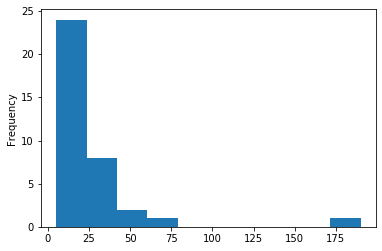

In [15]:
df["price_extracted"].plot.hist()

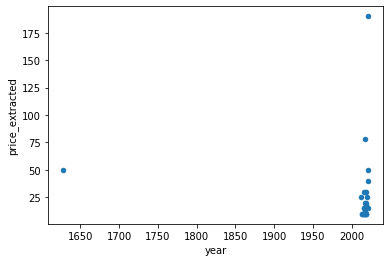

In [16]:
df.loc[df["year"]<2022].plot.scatter("year", "price_extracted",)

In [17]:
df["title_extracted"] = df["title"].str.extract("^(.*?)[\.,;:/]").fillna("").astype(str)

In [18]:
df.head()

,author,title,link,img_src,price,year,price_extracted,surname,title_extracted
0,Zürich 2017.,Loriot. Durchs Jahr mit Loriot.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"12,00 €",2017.0,12.00,,Loriot
1,Von Rebecca Seal. München 2017.,Lissabon. Rezepte aus dem Herzen Portugals.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €",2017.0,9.95,Seal,Lissabon
2,Von Hans-Jörg Wilke. Rangsdorf 2018.,Die Geschichte der Tierillustration in Deutsch...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 78,00 €",2018.0,78.00,Wilke,Die Geschichte der Tierillustration in Deutsch...
3,Leipzig 2021.,"Über die Dreistigkeit, über den Argwohn und üb...",https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"190,00 €",2021.0,190.00,,Über die Dreistigkeit
4,Von Klaus Honnef. Hg. Frank Darchinger. Köln 2...,Josef Heinrich Darchinger. Wirtschaftswunder.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"40,00 €",2021.0,40.00,Honnef,Josef Heinrich Darchinger


In [6]:
sys.path.append(os.path.abspath("./../../../code/"))

In [7]:
from fachreferats_functions import clean_data, check_duplicates, extract_data

In [21]:
df.head()

,author,title,link,img_src,price,year,price_extracted,surname,title_extracted
0,Zürich 2017.,Loriot. Durchs Jahr mit Loriot.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"12,00 €",2017.0,12.00,,Loriot
1,Von Rebecca Seal. München 2017.,Lissabon. Rezepte aus dem Herzen Portugals.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €",2017.0,9.95,Seal,Lissabon
2,Von Hans-Jörg Wilke. Rangsdorf 2018.,Die Geschichte der Tierillustration in Deutsch...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 78,00 €",2018.0,78.00,Wilke,Die Geschichte der Tierillustration in Deutsch...
3,Leipzig 2021.,"Über die Dreistigkeit, über den Argwohn und üb...",https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"190,00 €",2021.0,190.00,,Über die Dreistigkeit
4,Von Klaus Honnef. Hg. Frank Darchinger. Köln 2...,Josef Heinrich Darchinger. Wirtschaftswunder.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"40,00 €",2021.0,40.00,Honnef,Josef Heinrich Darchinger


In [22]:
df = extract_data.extract_fields_with_title_author(df, name_column_title = "title_extracted", name_column_author= "surname")

In [23]:
df.head()

,author,title,link,img_src,price,year,price_extracted,surname,title_extracted,nach_Titel_Autor_ppn,nach_Titel_Autor_medium,nach_Titel_Autor_Bestand_K10
0,Zürich 2017.,Loriot. Durchs Jahr mit Loriot.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"12,00 €",2017.0,12.00,,Loriot,1776110935|1755884478|1755660456|1755460775|17...,Aax|Oax|Aax|Aau|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aa...,118.0
1,Von Rebecca Seal. München 2017.,Lissabon. Rezepte aus dem Herzen Portugals.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €",2017.0,9.95,Seal,Lissabon,898658616,Aau,4.0
2,Von Hans-Jörg Wilke. Rangsdorf 2018.,Die Geschichte der Tierillustration in Deutsch...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 78,00 €",2018.0,78.00,Wilke,Die Geschichte der Tierillustration in Deutsch...,1018561226,Aau,19.0
3,Leipzig 2021.,"Über die Dreistigkeit, über den Argwohn und üb...",https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"190,00 €",2021.0,190.00,,Über die Dreistigkeit,1760161969|1760161861,Aax|Aaa,1.0
4,Von Klaus Honnef. Hg. Frank Darchinger. Köln 2...,Josef Heinrich Darchinger. Wirtschaftswunder.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"40,00 €",2021.0,40.00,Honnef,Josef Heinrich Darchinger,1761670824,Aax,1.0


In [24]:
df = check_duplicates.check_duplicate_with_title_author(df, name_column_title = "title_extracted", name_column_author= "surname")

In [25]:
df

,author,title,link,img_src,price,year,price_extracted,surname,title_extracted,nach_Titel_Autor_ppn,nach_Titel_Autor_medium,nach_Titel_Autor_Bestand_K10,nach_title_extracted_surname_Ort_Göttingen,nach_title_extracted_surname_Medium_Göttingen,nach_title_extracted_surname_URL_GUK,nach_title_extracted_surname_Bestand_Göttingen
0,Zürich 2017.,Loriot. Durchs Jahr mit Loriot.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"12,00 €",2017.0,12.00,,Loriot,1776110935|1755884478|1755660456|1755460775|17...,Aax|Oax|Aax|Aau|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aa...,118.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN
1,Von Rebecca Seal. München 2017.,Lissabon. Rezepte aus dem Herzen Portugals.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €",2017.0,9.95,Seal,Lissabon,898658616,Aau,4.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,0
2,Von Hans-Jörg Wilke. Rangsdorf 2018.,Die Geschichte der Tierillustration in Deutsch...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 78,00 €",2018.0,78.00,Wilke,Die Geschichte der Tierillustration in Deutsch...,1018561226,Aau,19.0,BBF : MAG,Aau,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,1
3,Leipzig 2021.,"Über die Dreistigkeit, über den Argwohn und üb...",https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"190,00 €",2021.0,190.00,,Über die Dreistigkeit,1760161969|1760161861,Aax|Aaa,1.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN
4,Von Klaus Honnef. Hg. Frank Darchinger. Köln 2...,Josef Heinrich Darchinger. Wirtschaftswunder.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"40,00 €",2021.0,40.00,Honnef,Josef Heinrich Darchinger,1761670824,Aax,1.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,0
5,Gosen-Neu Zittau 2019.,Der kleine Maulwurf. Was hörst du da? Soundbuch.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"14,95 €",2019.0,14.95,,Der kleine Maulwurf,1776114167|1758002565|1758002034|1758001615|17...,Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aa...,21.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,NaN
6,Von Pat Murphy. Stuttgart 2018.,LEGO® Kettenreaktionen: Bau dir 10 bewegliche ...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"19,99 €",2018.0,19.99,Murphy,LEGO® Kettenreaktionen,164483118X,Aau,1.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,0
7,"Hg. Ulf Küster. Katalog, Fondation Beyeler, Ri...",Edward Hopper. Landschaft neu gesehen.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"Sonderausgabe** 24,95 €",2020.0,24.95,Küster,Edward Hopper,1765510406|1691852198|1679510207|167950942X|16...,Aax|Lax|Aau|Aax|Aau|Aau,37.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,0
8,Hg. Freddie Röckenhaus. Hamburg 2018.,Russland von oben.,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,99 €",2018.0,9.99,Röckenhaus,Russland von oben,1685383092|1663039852|1020902485,Bau|Bau|Aau,10.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,0
9,Von Claude Gauvard. München 2019.,Notre-Dame de Paris. Der Bildband zur bekannte...,https://www.froelichundkaufmann.de/aktueller-n...,https://www.froelichundkaufmann.de/out/picture...,"nur 9,95 €",2019.0,9.95,Gauvard,Notre-Dame de Paris,1700508458|1670010236|1642687472|858719851|168...,Aax|Aau|Aau|Aau|Lax|Aau,17.0,,,https://opac.sub.uni-goettingen.de/DB=1/SET=2/...,0


In [26]:
df.to_csv("./../data/frohlichkaufman_controlled.tsv", sep="\t")

In [27]:
df["nach_title_extracted_surname_Bestand_Göttingen"] = df["nach_title_extracted_surname_Bestand_Göttingen"].fillna(0).astype(int)


In [28]:
df.loc[(df["nach_title_extracted_surname_Bestand_Göttingen"].fillna(0) < 1) & (df["nach_Titel_Autor_Bestand_K10"].fillna(0) > 0)].sort_values(by="nach_Titel_Autor_Bestand_K10", ascending=False)[['author',
 'title',
 'link',
 'year',
 'price_extracted',
 'nach_Titel_Autor_Bestand_K10',
  'nach_Titel_Autor_ppn',
 'nach_Titel_Autor_medium',
]]

,author,title,link,year,price_extracted,nach_Titel_Autor_Bestand_K10,nach_Titel_Autor_ppn,nach_Titel_Autor_medium
28,Reprint der letzten Ausgabe von 1628. Berlin 2...,Sebastian Münster. Cosmographia. Die Beschreib...,https://www.froelichundkaufmann.de/aktueller-n...,1628.0,49.95,331.0,1724712217|1698773331|1693734265|1688589805|16...,Bau|Bau|Osn|Asu|Aau|Asu|Oax|Aau|Aau|Oar|Asu|Aa...
0,Zürich 2017.,Loriot. Durchs Jahr mit Loriot.,https://www.froelichundkaufmann.de/aktueller-n...,2017.0,12.00,118.0,1776110935|1755884478|1755660456|1755460775|17...,Aax|Oax|Aax|Aau|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aa...
33,Sound-Adventskalender.,»It’s Christmas Time«. Vintage-Plattenspieler ...,https://www.froelichundkaufmann.de/aktueller-n...,NaN,29.00,63.0,1553373227|1553370309|1550942603|873131339|875...,BFu|Zcu|AFu|Bax|Bsu|Aau|Bau|Aan|Oax|Bar|BaX|Aa...
35,München / Wien 2017.,Fröhliche Weihnachten. Die schönsten Bilder de...,https://www.froelichundkaufmann.de/aktueller-n...,2017.0,12.00,44.0,1758283556|175799128X|1757987800|175492378X|17...,Aax|Aax|Aax|Aax|Aax|Aax|Aax|AFu|Aau|Aax|Oax|Oa...
15,"Hg. Bastian Eclercy, u. a. Katalog, Städel Mus...",Tizian und die Renaissance in Venedig.,https://www.froelichundkaufmann.de/aktueller-n...,2019.0,19.95,37.0,1665774568|1040169333,Aau|Aau
7,"Hg. Ulf Küster. Katalog, Fondation Beyeler, Ri...",Edward Hopper. Landschaft neu gesehen.,https://www.froelichundkaufmann.de/aktueller-n...,2020.0,24.95,37.0,1765510406|1691852198|1679510207|167950942X|16...,Aax|Lax|Aau|Aax|Aau|Aau
22,Von Sylvia Sumira. Darmstadt 2016.,"Der Globus. 400 Jahre Geschichte, Macht, Entde...",https://www.froelichundkaufmann.de/aktueller-n...,2016.0,14.95,32.0,857708473|1747016438|174660090X|1624490794|174...,Aau|Asr|Osr|Asn|Asr|Osr
12,Von Hauke Friederichs. Berlin 2019.,"Funkenflug. August 1939. Der Sommer, bevor der...",https://www.froelichundkaufmann.de/aktueller-n...,2019.0,9.95,23.0,1741127947|1733277854|1670707318|166491028X,Aau|Aax|Oax|Aau
5,Gosen-Neu Zittau 2019.,Der kleine Maulwurf. Was hörst du da? Soundbuch.,https://www.froelichundkaufmann.de/aktueller-n...,2019.0,14.95,21.0,1776114167|1758002565|1758002034|1758001615|17...,Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aax|Aa...
25,Von Simon Winchester. München 2013.,Der Atlantik. Biografie eines Ozeans.,https://www.froelichundkaufmann.de/aktueller-n...,2013.0,9.95,19.0,785149848|1691955035|722730233,Aau|Lax|Aau


In [29]:
df.loc[0]["link"]

'https://www.froelichundkaufmann.de/aktueller-newsletter/loriot-durchs-jahr-mit-loriot.html?force_sid=12dkq0duit6vrmatnilvdbq35o'

In [30]:
df.loc[df["nach_Titel_Autor_Bestand_K10"].fillna(0) == 0].sort_values(by="nach_Titel_Autor_Bestand_K10", ascending=False)[['author',
 'title',
 'link',
 'year',
 'price_extracted',
 'nach_Titel_Autor_Bestand_K10',
  'nach_Titel_Autor_ppn',
 'nach_Titel_Autor_medium',
]]

,author,title,link,year,price_extracted,nach_Titel_Autor_Bestand_K10,nach_Titel_Autor_ppn,nach_Titel_Autor_medium
14,Von Courtney Watson McCarthy. London 2019.,Leonardo Pop-Ups.,https://www.froelichundkaufmann.de/aktueller-n...,2019.0,18.00,NaN,NaN,NaN
32,"Kinderkoffer, Plüschpuppe, Magnet.","Pettersson Findus Set, 3-teilig.",https://www.froelichundkaufmann.de/aktueller-n...,NaN,19.95,NaN,NaN,NaN
34,Der mondäne Stil der Goldenen Zwanziger.,Art Deco Kalender 2022. 16 Monatsblätter.,https://www.froelichundkaufmann.de/aktueller-n...,NaN,5.00,NaN,NaN,NaN


In [31]:
df.columns.tolist()

['author',
 'title',
 'link',
 'img_src',
 'price',
 'year',
 'price_extracted',
 'surname',
 'title_extracted',
 'nach_Titel_Autor_ppn',
 'nach_Titel_Autor_medium',
 'nach_Titel_Autor_Bestand_K10',
 'nach_title_extracted_surname_Ort_Göttingen',
 'nach_title_extracted_surname_Medium_Göttingen',
 'nach_title_extracted_surname_URL_GUK',
 'nach_title_extracted_surname_Bestand_Göttingen']